<a href="https://colab.research.google.com/github/Kenjiro1/Formacao_IA/blob/main/Projetos/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [5]:
CSV_GITHUB_URL = "https://raw.githubusercontent.com/Kenjiro1/Formacao_IA/refs/heads/main/dados/insurance.csv"
base = pd.read_csv(CSV_GITHUB_URL, keep_default_na=False)
base = base.drop(columns = ['Unnamed: 0'])
base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [6]:
#Our Target it is accident
Y = base['Accident']
X = base.drop(columns = ['Accident'],axis=1).values
print(type(X))
print("="* 20)
print(type(Y))
print("="* 20)
X


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [9]:
encoder = LabelEncoder()
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = encoder.fit_transform(X[:,i])

X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 2, 1, ..., 1, 3, 2],
       [0, 2, 2, ..., 1, 3, 1],
       ...,
       [0, 2, 2, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2],
       [0, 1, 0, ..., 1, 3, 2]], dtype=object)

In [10]:
X_treinamento, X_test, Y_treinamento, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12)


In [11]:
modelo = RandomForestClassifier(random_state=1, max_depth=20, max_leaf_nodes=12, n_estimators=500) #n_estimators quantas arvores de decisao ele vai induzir
modelo.fit(X_treinamento, Y_treinamento)

RandomForestClassifier(max_depth=20, max_leaf_nodes=12, n_estimators=500,
                       random_state=1)

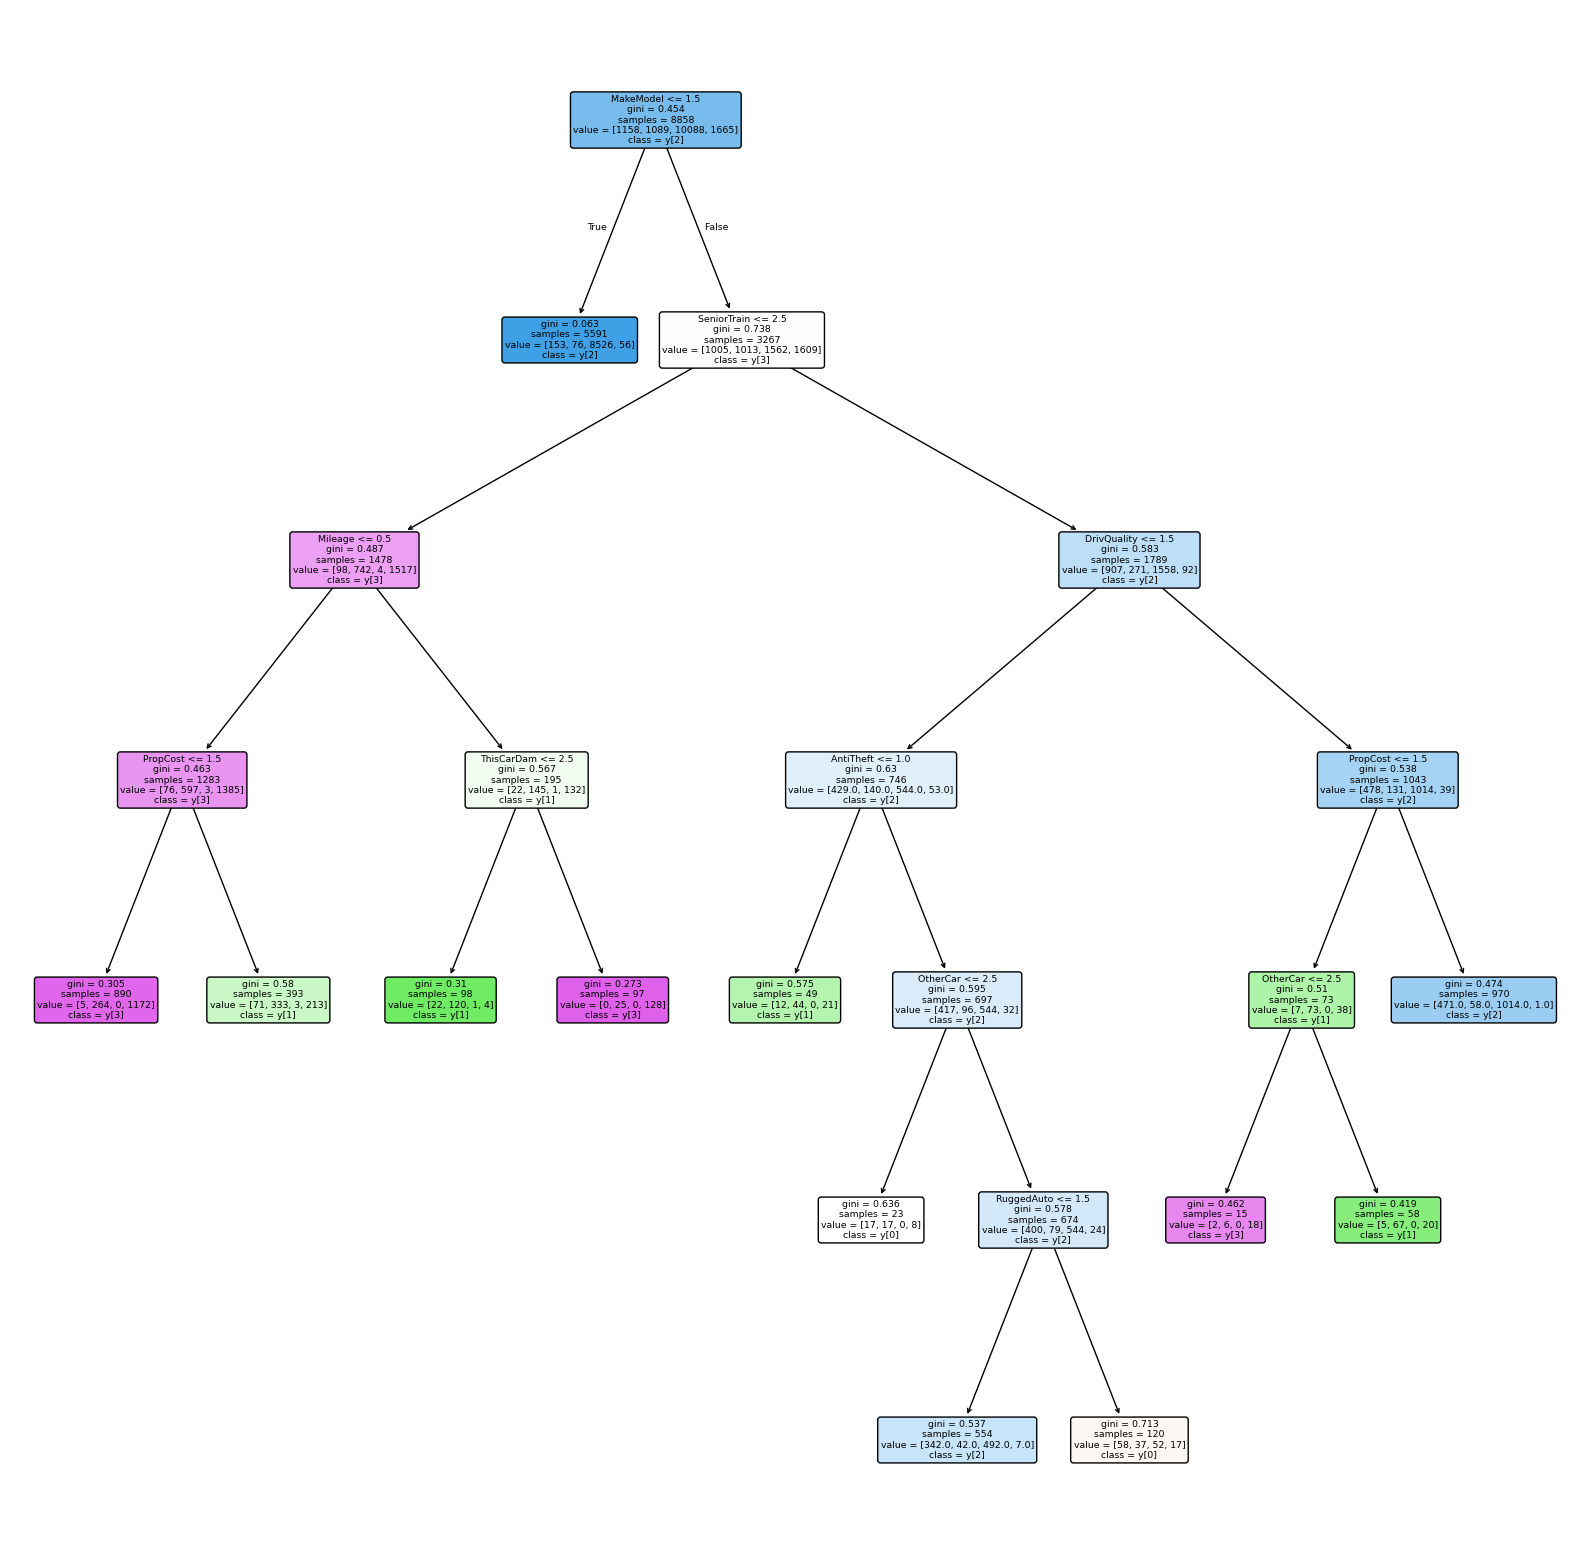

In [15]:
tree_index = 51 #Dentre as 500 dadas
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,20))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1],class_names=True, rounded= True)
plt.show()

In [16]:
predict = modelo.predict(X_test)

In [18]:
print(accuracy_score(Y_test, predict))
print(f1_score(Y_test, predict, average='weighted'))
print(precision_score(Y_test, predict, average='weighted'))
print(recall_score(Y_test, predict, average='weighted'))

0.9296666666666666
0.9252184168338298
0.9264995089298133
0.9296666666666666
